In [3]:
cd

C:\Users\dcarruth


In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from textwrap import wrap
from matplotlib.font_manager import FontProperties
import re
from scipy import stats
from matplotlib.lines import Line2D 

line_size=0.5
custom_params = {
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': 'black',
    'figure.facecolor': 'white',
    "axes.spines.right": True, 
    "axes.spines.bottom": True,
    'xtick.direction': 'inout',
    'ytick.direction': 'in',
    'xtick.bottom': True,
    'xtick.minor.visible': False,
    'xtick.major.bottom':  True,
    'xtick.minor.bottom':  True,
    'xtick.major.pad':     7,     # distance to major tick label in points#
    'xtick.minor.pad':     3.4,     # distance to the minor tick label in points#
    'xtick.major.size':    10,
    'ytick.major.size':    4,
    'xtick.major.width':   line_size,
    'ytick.major.width':   line_size,
    'axes.linewidth': line_size,
    'xtick.minor.size':    2,
    'pdf.fonttype': 42}

sns.set_theme(style="ticks", rc=custom_params, font="Arial",font_scale=0.7)

enmax_palette = ["#648FFF", "#FE6100", "#785EF0", "#DC267F", "#FFB000"]
sns.set_palette(palette=enmax_palette)

In [2]:
fig="KOs_KDs"
df = pd.read_csv('Figure_Data//250226_dCas9_Amalgam.csv')
df_sorted = df.sort_values(by='Strain', ascending=True)
df_sorted
data=df_sorted.copy()

sns.set_palette(palette=enmax_palette)
w=len(data)/18
print(w)
plt.figure(figsize=(w,2.5))

#plot stripplot overlaid on a barplot
with sns.color_palette():
    ax=sns.stripplot(
        data=data, x="Strain", 
        y="Titer", 
        hue="Type", 
        dodge=True, alpha=0.7, linewidth =line_size, edgecolor="0", zorder=2)

    ax=sns.barplot(
        data, x="Strain", y="Titer", hue="Type",
        errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=line_size,
        linewidth =line_size, edgecolor="0", ax=ax,saturation=1)
    legend_handles, labels = ax.get_legend_handles_labels()

#format axes and legend
plt.xlabel('Gene Knockouts', labelpad=15)
plt.ylabel('Titer (mg/L)', labelpad=10)
plt.legend(legend_handles, ['_','_','_','CRISPRi','Non-Target','Target'],loc='upper right')

plt.ylim(0,)
plt.xticks(rotation='vertical',style='italic') 

ax.set_xlim(-0.65,None)

plt.savefig(f'Figure_Export\\{fig}.svg',dpi=1200, bbox_inches = 'tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Figure_Data//250310_AMBR.csv'

2.625


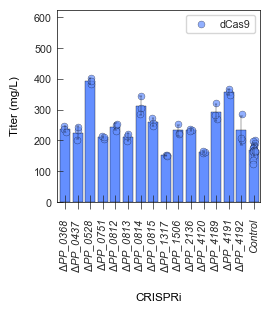

In [77]:
specific_type = "dCas9"  # Change this to the specific type you want to plot
line_size=0.25

# Load and prepare the data
fig = "KOs_KDs"
df = pd.read_csv('Figure_Data/250226_dCas9_Amalgam.csv')
df_sorted = df.sort_values(by='Strain', ascending=True)
data = df_sorted.copy()
data_specific = data[data['Type'] == specific_type]
# Set the custom palette
sns.set_palette(enmax_palette)

# Calculate the width of the figure
w = len(data_specific) / 24
print(w)
plt.figure(figsize=(w, 2.5))

# Select a specific color for the plots
color = enmax_palette[0]  # You can choose a different index to select a different color

# Plot stripplot overlaid on a barplot
ax = sns.stripplot(
    data=data_specific, x="Strain", 
    y="Titer", 
    dodge=True, alpha=0.7, linewidth=line_size, edgecolor="0", zorder=2, color=color)

ax = sns.barplot(
    data=data_specific, x="Strain", y="Titer",
    errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=line_size,
    linewidth=line_size, edgecolor="0", ax=ax, saturation=1, color=color)

# Format axes and legend
plt.xlabel('CRISPRi', labelpad=15)
plt.ylabel('Titer (mg/L)', labelpad=10)
plt.legend([specific_type], loc='upper right')

plt.ylim(0,625)
plt.xticks(rotation='vertical', style='italic')

ax.set_xlim(-0.65, None)

plt.savefig(f'Figure_Export/{fig}_{specific_type}.pdf', dpi=1200, bbox_inches='tight')
plt.show()

2.625


C:\Users\Carruthers\AppData\Local\Temp\ipykernel_27712\4248511952.py:38: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(legend_handles, ['_','_','Non-target','Target'], loc='upper right', ncol=1)


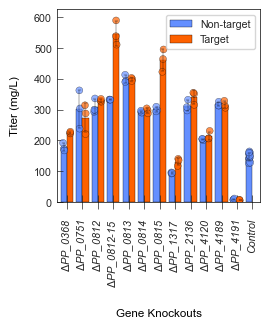

In [78]:
# Define the specific types you want to plot
specific_types = ["Target", "Non-target"]  # Change these to the specific types you want to plot

# Load and prepare the data
fig = "KOs_KDs"
df = pd.read_csv('Figure_Data/250226_dCas9_Amalgam.csv')
df_sorted = df.sort_values(by='Strain', ascending=True)
data = df_sorted.copy()

# Filter the data for the specific types
data_specific = data[data['Type'].isin(specific_types)]

# Set the custom palette
sns.set_palette(enmax_palette)

# Calculate the width of the figure
w = len(data_specific) / 30
w=2.625
print(w)
plt.figure(figsize=(w, 2.5))

with sns.color_palette():
    ax=sns.stripplot(
        data=data_specific, x="Strain", 
        y="Titer", hue='Type', 
        dodge=True, alpha=0.7, linewidth=line_size, edgecolor="0", zorder=2)
    
    ax=sns.barplot(
        data=data_specific, x="Strain", y="Titer", hue='Type',
        errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=line_size,
        linewidth=line_size, edgecolor="0", saturation=1)
    legend_handles, labels = ax.get_legend_handles_labels()
    
# Format axes and legend
plt.xlabel('Gene Knockouts', labelpad=15)
plt.ylabel('Titer (mg/L)', labelpad=10)
plt.legend(loc='upper right')
plt.legend(legend_handles, ['_','_','Non-target','Target'], loc='upper right', ncol=1)

plt.ylim(0,625)
plt.xticks(rotation='vertical', style='italic')

plt.xlim(-0.65, None)

plt.savefig(f'Figure_Export/{fig}_Target_Non-target.pdf', dpi=1200, bbox_inches='tight')
plt.show()

4


C:\Users\Carruthers\AppData\Local\Temp\ipykernel_27712\1585584531.py:33: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(legend_handles, ['_','_','_','CRISPRi','$\Delta$ with Non-target','$\Delta$ with Target'], loc='upper right', ncol=1)


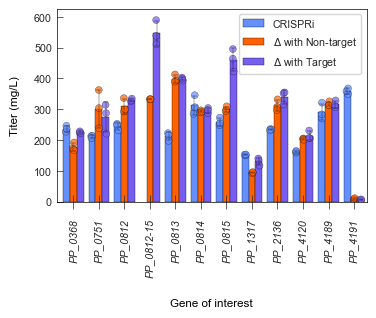

In [91]:
# Load and prepare the data
fig = "KOs_KDs"
df = pd.read_csv('Figure_Data/250226_dCas9_Amalgam_Trunc.csv')
df_sorted = df.sort_values(by='Strain', ascending=True)
data = df_sorted.copy()


# Set the custom palette
sns.set_palette(enmax_palette)

# Calculate the width of the figure
w = len(data) / 30
w=4
print(w)
plt.figure(figsize=(w, 2.5))

with sns.color_palette():
    ax=sns.stripplot(
        data=data, x="Strain", 
        y="Titer", hue='Type', 
        dodge=True, alpha=0.7, linewidth=line_size, edgecolor="0", zorder=2)
    
    ax=sns.barplot(
        data=data, x="Strain", y="Titer", hue='Type',
        errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=line_size,
        linewidth=line_size, edgecolor="0", saturation=1)
    legend_handles, labels = ax.get_legend_handles_labels()
    
# Format axes and legend
plt.xlabel('Gene of interest', labelpad=15)
plt.ylabel('Titer (mg/L)', labelpad=10)
plt.legend(loc='upper right')
plt.legend(legend_handles, ['_','_','_','CRISPRi','$\Delta$ with Non-target','$\Delta$ with Target'], loc='upper right', ncol=1)

plt.ylim(0,625)
plt.xticks(rotation='vertical', style='italic')

plt.xlim(-0.65, None)

plt.savefig(f'Figure_Export/{fig}_Target_Non-target.pdf', dpi=1200, bbox_inches='tight')
plt.show()

4


C:\Users\Carruthers\AppData\Local\Temp\ipykernel_27712\3264962949.py:44: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(legend_handles, ['_', '_', '_', 'CRISPRi', '$\Delta$ with Non-target', '$\Delta$ with Target'], loc='upper left', ncol=1)


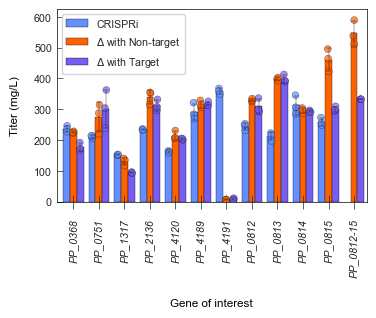

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the data
fig = "KOs_KDs"
df = pd.read_csv('Figure_Data/250226_dCas9_Amalgam_Trunc.csv')

# Define the specific order of strains
strain_order = ['PP_0368', 'PP_0751', 'PP_1317', 'PP_2136', 'PP_4120', 'PP_4189', 'PP_4191', 'PP_0812', 'PP_0813', 'PP_0814', 'PP_0815', 'PP_0812-15']  # Add all your strains in the desired order

# Convert the 'Strain' column to a categorical type with the specified order
df['Strain'] = pd.Categorical(df['Strain'], categories=strain_order, ordered=True)

# Sort the dataframe by the categorical 'Strain' column
df_sorted = df.sort_values(by='Strain')
data = df_sorted.copy()

# Set the custom palette
sns.set_palette(enmax_palette)

# Calculate the width of the figure
w = len(data) / 30
w = 4
print(w)
plt.figure(figsize=(w, 2.5))

with sns.color_palette():
    ax = sns.stripplot(
        data=data, x="Strain", 
        y="Titer", hue='Type', 
        dodge=True, alpha=0.7, linewidth=line_size, edgecolor="0", zorder=2)
    
    ax = sns.barplot(
        data=data, x="Strain", y="Titer", hue='Type',
        errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=line_size,
        linewidth=line_size, edgecolor="0", saturation=1)
    legend_handles, labels = ax.get_legend_handles_labels()
    
# Format axes and legend
plt.xlabel('Gene of interest', labelpad=15)
plt.ylabel('Titer (mg/L)', labelpad=10)
plt.legend(loc='upper right')
plt.legend(legend_handles, ['_', '_', '_', 'CRISPRi', '$\Delta$ with Non-target', '$\Delta$ with Target'], loc='upper left', ncol=1)

plt.ylim(0, 625)
plt.xticks(rotation='vertical', style='italic')

plt.xlim(-0.65, None)

plt.savefig(f'Figure_Export/{fig}_Target_Non-target.pdf', dpi=1200, bbox_inches='tight')
plt.show()

3.0


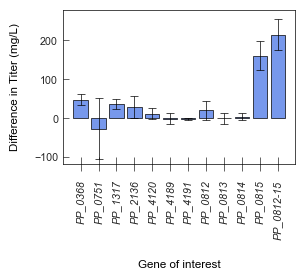

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the data
fig = "KOs_KDs"
df = pd.read_csv('Figure_Data/250226_dCas9_Amalgam_Trunc.csv')

# Define the specific order of strains
strain_order = ['PP_0368', 'PP_0751', 'PP_1317', 'PP_2136', 'PP_4120', 'PP_4189', 'PP_4191', 'PP_0812', 'PP_0813', 'PP_0814', 'PP_0815', 'PP_0812-15']  # Add all your strains in the desired order

# Convert the 'Strain' column to a categorical type with the specified order
df['Strain'] = pd.Categorical(df['Strain'], categories=strain_order, ordered=True)

# Calculate mean and standard deviation for target and non-target values for each strain
means = df.groupby(['Strain', 'Type'])['Titer'].mean().unstack()
stds = df.groupby(['Strain', 'Type'])['Titer'].std().unstack()

# Calculate the difference and the propagated error
diffs = means['Target'] - means['Non-target']
errors = np.sqrt(stds['Target']**2 + stds['Non-target']**2)

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Strain': strain_order, 'Difference': diffs, 'Error': errors})

# Plot the fractional differences with error bars
w = len(plot_data) / 4
print(w)
plt.figure(figsize=(w, 2))

bar_color = "#648FFF"

ax = sns.barplot(data=plot_data, x='Strain', y='Difference', color=bar_color, edgecolor="0", linewidth=line_size)

# Add error bars with caps
for i in range(len(plot_data)):
    plt.errorbar(x=i, y=plot_data['Difference'][i], yerr=plot_data['Error'][i], fmt='none', c='black', capsize=3, capthick=line_size, elinewidth=line_size, zorder=3)

# Format axes and legend
plt.xlabel('Gene of interest', labelpad=15)
plt.ylabel('Difference in Titer (mg/L)', labelpad=10)
plt.ylim(min(plot_data['Difference'] - plot_data['Error']) * 1.1, max(plot_data['Difference'] + plot_data['Error']) * 1.1)
plt.xticks(rotation='vertical', style='italic')

plt.savefig(f'Figure_Export/{fig}_Difference_Target_Non-target.pdf', dpi=1200, bbox_inches='tight')
plt.show()

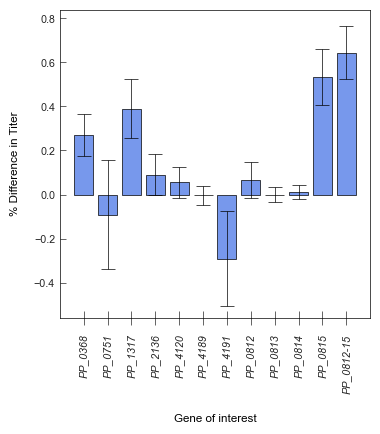

In [3]:
### import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the data
fig = "KOs_KDs"
df = pd.read_csv('Figure_Data/250226_dCas9_Amalgam_Trunc.csv')

# Define the specific order of strains
strain_order = ['PP_0368', 'PP_0751', 'PP_1317', 'PP_2136', 'PP_4120', 'PP_4189', 'PP_4191', 'PP_0812', 'PP_0813', 'PP_0814', 'PP_0815', 'PP_0812-15']  # Add all your strains in the desired order

# Convert the 'Strain' column to a categorical type with the specified order
df['Strain'] = pd.Categorical(df['Strain'], categories=strain_order, ordered=True)

# Calculate mean and standard deviation for target and non-target values for each strain
means = df.groupby(['Strain', 'Type'])['Titer'].mean().unstack()
stds = df.groupby(['Strain', 'Type'])['Titer'].std().unstack()

# Calculate the fractional difference and the propagated error
fractional_diffs = (means['Target'] - means['Non-target']) / means['Non-target']
errors = np.sqrt((stds['Target'] / means['Non-target'])**2 + ((means['Target'] * stds['Non-target']) / (means['Non-target']**2))**2)

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Strain': strain_order, 'Fractional_Difference': fractional_diffs, 'Error': errors})

# Plot the fractional differences with error bars
w = len(plot_data) / 3
plt.figure(figsize=(w, 4))

# Use a single color for all bars
bar_color = "#648FFF"

ax = sns.barplot(data=plot_data, x='Strain', y='Fractional_Difference', color=bar_color, edgecolor="0", linewidth=line_size)

# Add error bars with caps
for i in range(len(plot_data)):
    plt.errorbar(x=i, y=plot_data['Fractional_Difference'][i], yerr=plot_data['Error'][i], fmt='none', c='black', capsize=5, capthick=line_size, elinewidth=line_size, zorder=3)

# Format axes and legend
plt.xlabel('Gene of interest', labelpad=15)
plt.ylabel('% Difference in Titer', labelpad=10)
plt.ylim(min(plot_data['Fractional_Difference'] - plot_data['Error']) * 1.1, max(plot_data['Fractional_Difference'] + plot_data['Error']) * 1.1)
plt.xticks(rotation='vertical', style='italic')

plt.savefig(f'Figure_Export/{fig}_Fractional_Difference_Target_Non-target.pdf', dpi=1200, bbox_inches='tight')
plt.show()

6.0


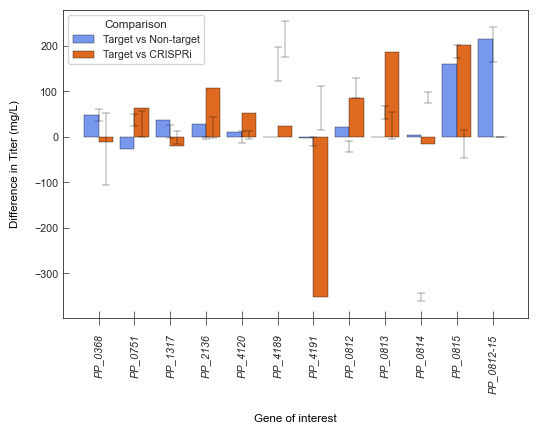

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare the data
fig = "KOs_KDs"
df = pd.read_csv('Figure_Data/250226_dCas9_Amalgam_Trunc.csv')

# Define the specific order of strains
strain_order = ['PP_0368', 'PP_0751', 'PP_1317', 'PP_2136', 'PP_4120', 'PP_4189', 'PP_4191', 'PP_0812', 'PP_0813', 'PP_0814', 'PP_0815', 'PP_0812-15']  # Add all your strains in the desired order

# Convert the 'Strain' column to a categorical type with the specified order
df['Strain'] = pd.Categorical(df['Strain'], categories=strain_order, ordered=True)

# Calculate mean and standard deviation for target, non-target, and CRISPRi values for each strain
means = df.groupby(['Strain', 'Type'])['Titer'].mean().unstack()
stds = df.groupby(['Strain', 'Type'])['Titer'].std().unstack()

# Calculate the differences and the propagated errors
diffs_nt = means['Target'] - means['Non-target']
errors_nt = np.sqrt(stds['Target']**2 + stds['Non-target']**2)

diffs_crispri = means['Target'] - means['CRISPRi']
errors_crispri = np.sqrt(stds['Target']**2 + stds['CRISPRi']**2)

# Handle the special case where 'PP_0812-15' CRISPRi-Target difference doesn't exist
if 'PP_0812-15' in strain_order:
    diffs_crispri['PP_0812-15'] = 0
    errors_crispri['PP_0812-15'] = 0

# Create a combined DataFrame for plotting
plot_data_nt = pd.DataFrame({'Strain': strain_order, 'Difference': diffs_nt, 'Error': errors_nt, 'Comparison': 'Target vs Non-target'})
plot_data_crispri = pd.DataFrame({'Strain': strain_order, 'Difference': diffs_crispri, 'Error': errors_crispri, 'Comparison': 'Target vs CRISPRi'})

plot_data = pd.concat([plot_data_nt, plot_data_crispri])

# Plot the differences with error bars
w = len(strain_order) / 2
print(w)
plt.figure(figsize=(w, 4))

bar_color_nt = "#648FFF"
bar_color_crispri = "#FE6100"
line_size = 0.25  # Define line_size for error bars and bar borders

ax = sns.barplot(data=plot_data, x='Strain', y='Difference', hue='Comparison', palette=[bar_color_nt, bar_color_crispri], edgecolor="0", linewidth=line_size)

# Add error bars with caps
for i, (strain, comparison) in enumerate(zip(plot_data['Strain'], plot_data['Comparison'])):
    x = i // 2 + (i % 2) * 0.2
    y = plot_data['Difference'].values[i]
    yerr = plot_data['Error'].values[i]
    plt.errorbar(x=x, y=y, yerr=yerr, fmt='none', c='black', capsize=3, capthick=line_size, elinewidth=line_size, zorder=3)

# Format axes and legend
plt.xlabel('Gene of interest', labelpad=15)
plt.ylabel('Difference in Titer (mg/L)', labelpad=10)
plt.ylim(min(plot_data['Difference'] - plot_data['Error']) * 1.1, max(plot_data['Difference'] + plot_data['Error']) * 1.1)
plt.xticks(rotation='vertical', style='italic')
plt.legend(title='Comparison')

plt.savefig(f'Figure_Export/{fig}_Difference_Target_Non-target_CRISPRi.pdf', dpi=1200, bbox_inches='tight')
plt.show()